In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sciop


In [2]:
N = 5
x_ket = basis(N,0)
y_ket = basis(N,1)
z_ket = basis(N,2)
a_ket = basis(N,3)
b_ket = basis(N,4)

x_bra = x_ket.dag()
y_bra = y_ket.dag()
z_bra = z_ket.dag()
a_bra = a_ket.dag()
b_bra = b_ket.dag()

x_id = fock_dm(N, 0)
y_id = fock_dm(N, 1)
z_id = fock_dm(N,2)
a_id = fock_dm(N, 3)
b_id = fock_dm(N, 4)

spont_collapse = b_ket*y_bra
cav_collapse  = a_ket*x_bra

g0 = 2*np.pi * 1
rabi = 2*np.pi * 6
gamma = 2*np.pi *0.1
kappa = 2*np.pi *0.3

H = -g0*(x_ket*y_bra + y_ket*x_bra) - rabi/2*(z_ket*y_bra + y_ket*z_bra)

c_ops = [np.sqrt(gamma)*spont_collapse, np.sqrt(kappa)*cav_collapse]

num_step = 100001
time  = np.linspace(0,100,num_step)

result = mesolve(H, z_ket, time, c_ops)

g_pop = expect(x_id, result.states)
x_pop = expect(y_id, result.states)
u_pop = expect(z_id, result.states)

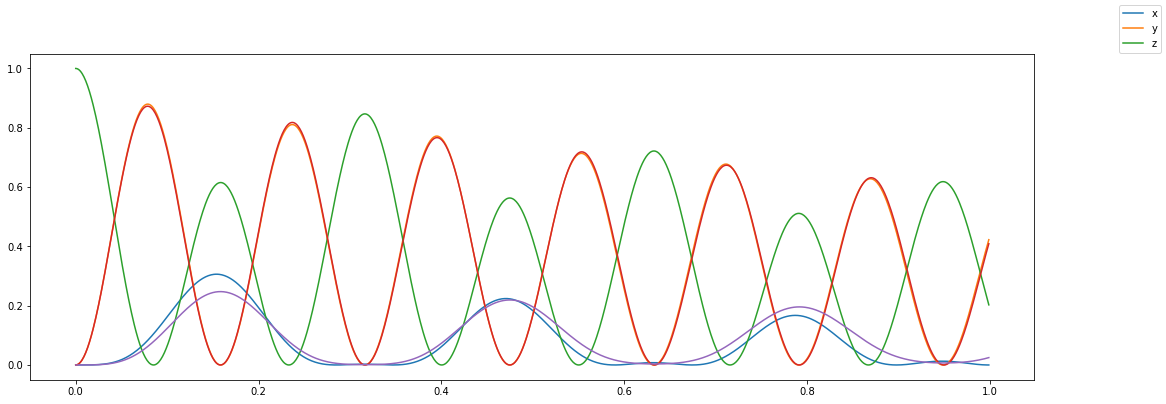

In [11]:
start = round(num_step*0)
end = round(num_step*0.01)
fig,ax = plt.subplots(1,1)
# ax.plot(time, expect(a_id, result.states))
# ax.plot(time, expect(b_id, result.states))

ax.plot(time[start:end],g_pop[start:end], label='x')

ax.plot(time[start:end],x_pop[start:end], label='y')
ax.plot(time[start:end],u_pop[start:end], label='z')

def fit_func_x(t, a, b,c):
    return a*np.exp(-b*t)*np.sin(c*t)**2

def fit_func_u(t,a,b,c):
    return 0.09*np.abs(1j*rabi*a/(2*(b**2+c**2))*(c-np.exp(-b*t)*(b*np.sin(c*t)+c*np.cos(c*t))))**2

params = sciop.curve_fit(fit_func_x, time, x_pop, [1,gamma/2, rabi])[0]

a = params[0]*1.5
b = params[1]
c = params[2]/1.9

fitted_x = [fit_func_x(t, a, b, c)for t in time]
fitted_u = [fit_func_u(t, a,b,c) for t in time]

ax.plot(time[start:end], fitted_x[start:end])
ax.plot(time[start:end], fitted_u[start:end])

# print((np.exp(-gamma*0)*np.cos(g0*0))**2)
fig.legend()
fig.set_size_inches(18,6)


In [4]:
print(fitted[0])

0.0
